In [1]:
from ising import Ising
import numpy as np

from matplotlib import pyplot as plt

In [2]:
j_vals = np.linspace(0.1, 1.0, 10)
L = 100
num_therm = 100
mag_per_spin_arr = np.zeros(num_therm)
succeptibility_arr = np.zeros(num_therm)
specific_heat_arr = np.zeros(num_therm)
energy_arr = np.zeros(num_therm)

visual_arr = []

In [3]:
def calculate_running_average(arr, n):
    return np.convolve(arr, np.ones((n))/n, mode='valid')

def flatten_point(running_avg, threshold):
    diff = np.diff(running_avg)
    flatten_point = np.where(np.abs(diff) < threshold)[0]
    if flatten_point.size > 0:
        return flatten_point[0]
    else:
        return len(running_avg)



rav = calculate_running_average(mag_per_spin_arr, 5)
threshold = 0.001
fp = flatten_point(rav, threshold)

In [4]:
j_vals = np.linspace(0.1, 1.0, 10)
avg_mags = np.zeros(len(j_vals))
avg_sucs = np.zeros(len(j_vals))
avg_spec = np.zeros(len(j_vals))
avg_energy = np.zeros(len(j_vals))

for i, j in enumerate(j_vals):
    ising = Ising(L,j,0)
    for l in range(num_therm):
        ising.do_thermalisation_sweep()
        mag_per_spin_arr[l] = ising.get_mag_per_spin()
        succeptibility_arr[l] = ising.get_succeptibility()
        specific_heat_arr[l] = ising.get_specific_heat()
        energy_arr[l] = ising.get_energy_per_spin()
    # mag_per_spin_arr = np.array([ising.do_thermalisation_sweep() or ising.get_mag_per_spin() for _ in range(num_therm)])
    rav = calculate_running_average(mag_per_spin_arr, 5)
    fp = flatten_point(rav, threshold)
    # print(f'j: {j}, b: {b}, fp: {fp}')
    avg_mags[i] = np.mean(mag_per_spin_arr[fp:])  # Store the average magnetisation in the 2D array
    avg_sucs[i] = np.mean(succeptibility_arr[fp:])
    avg_spec[i] = np.mean(specific_heat_arr[fp:])
    avg_energy[i] = np.mean(energy_arr[fp:])
    # avg_mags_err[i, k] = np.std(mag_per_spin_arr[fp:])/np.sqrt(len(mag_per_spin_arr[fp:])) # Store the average magnetisation in the 2D array
    print(i)
    

TypeError: only integer scalar arrays can be converted to a scalar index

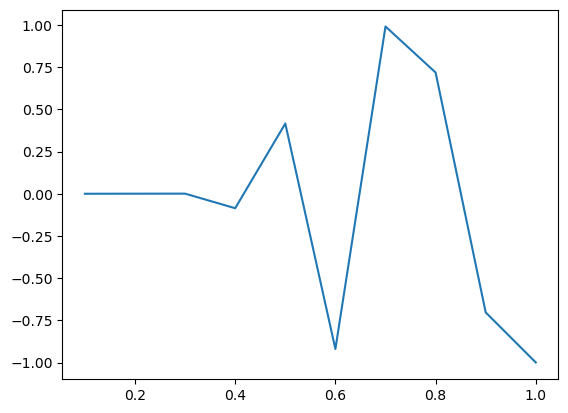

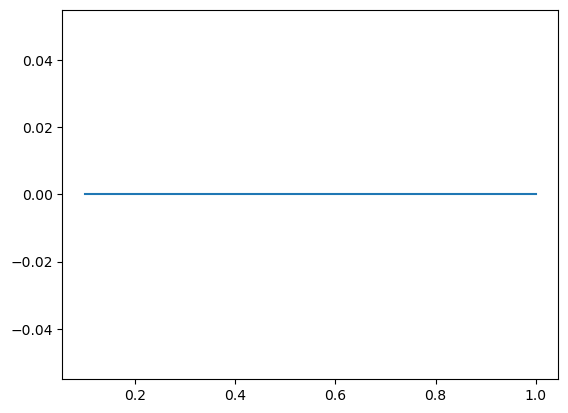

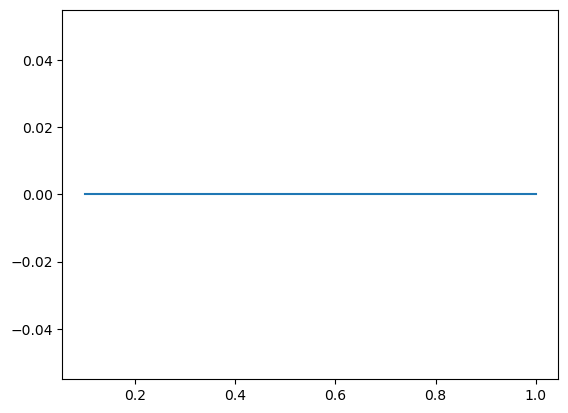

In [ ]:
plt.figure(0)
plt.plot(j_vals, avg_mags)

plt.figure(1)
plt.plot(j_vals, avg_sucs)

plt.figure(2)
plt.plot(j_vals, avg_spec) 
plt.show()